### 공시지가 추가해서 피쳐 정리

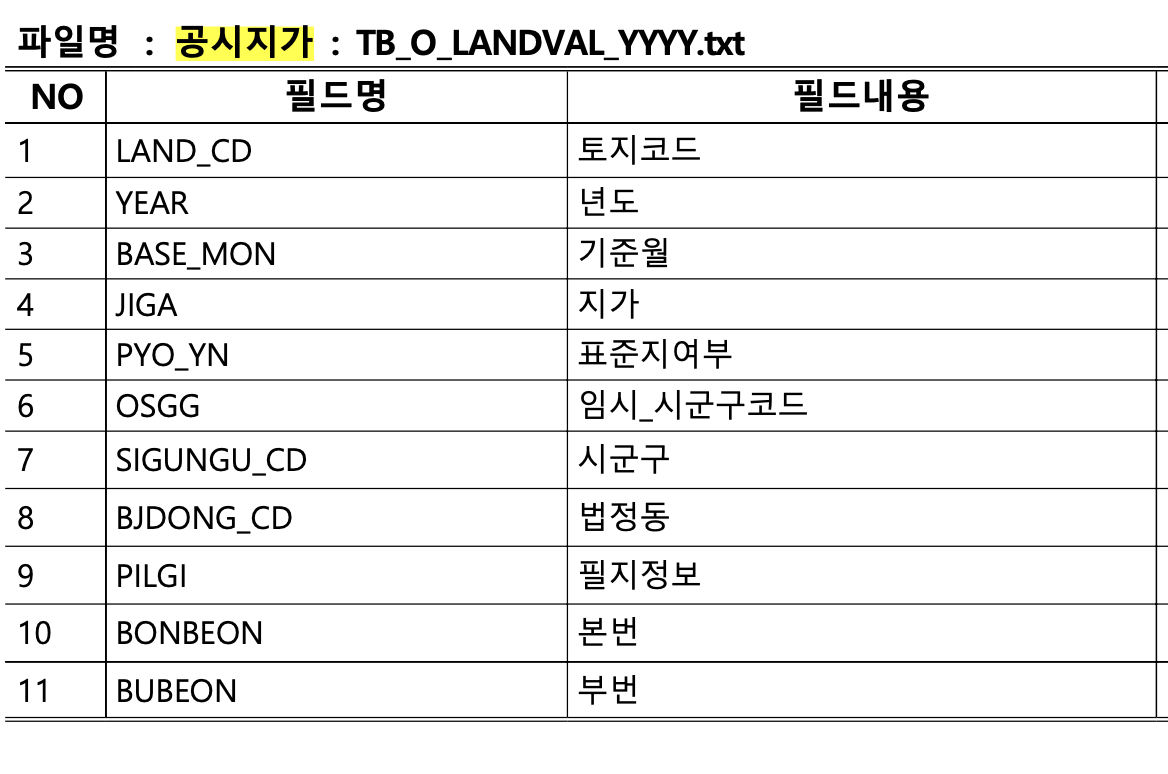

In [2]:
import pandas as pd

file_path = 'landvalue.txt'

# 파일을 읽고 백틱을 제거한 후 데이터프레임으로 변환
with open(file_path, 'r', encoding='utf-8') as file:
    # 파일의 모든 줄을 읽습니다.
    lines = file.readlines()

# 각 줄에서 백틱을 제거
cleaned_lines = [line.replace('`', '') for line in lines]

temp_file_path = 'cleaned_file.txt'
with open(temp_file_path, 'w', encoding='utf-8') as temp_file:
    temp_file.writelines(cleaned_lines)

df = pd.read_csv(temp_file_path, delimiter=',')

df

/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_51351/112279621.py:17: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(temp_file_path, delimiter=',')


,LAND_CD,YEAR,BASE_MON,JIGA,PYO_YN,OSGG,SIGUNGU_CD,BJDONG_CD,PILGI,BONBEON,BUBEON
0,1111010100100010000,2024,1,5150000.0,1,11110,11110,10100,1,1,0
1,1111010100100010001,2024,1,1572000.0,0,11110,11110,10100,1,1,1
2,1111010100100010002,2024,1,2370000.0,0,11110,11110,10100,1,1,2
3,1111010100100010003,2024,1,5133000.0,0,11110,11110,10100,1,1,3
4,1111010100100010004,2024,1,1839000.0,0,11110,11110,10100,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
894230,11740110005중학0001,2024,1,2878000.0,1,11740,11740,11000,5,중학00,1
894231,11740110005체육0002,2024,1,2762000.0,0,11740,11740,11000,5,체육00,2
894232,11740110005초등0001,2024,1,2705000.0,0,11740,11740,11000,5,초등00,1
894233,11740110005초등0003,2024,1,2762000.0,0,11740,11740,11000,5,초등00,3


In [16]:
add = pd.read_csv('total.csv')
add = add.iloc[:, 0:7]
add.head()

,cafe_nm,address,Longitude,Latitude,법정동코드,본번,부번
0,카페숲,서울특별시 금천구 시흥대로40길,126.909939,37.446689,1154510300,929,10.0
1,매머드커피외대,서울특별시 동대문구 천장산로7길,127.056962,37.598493,1123011000,264,223.0
2,포르마레,서울특별시 강동구 성내로9길,127.125070,37.530474,1174010800,534,7.0
3,카페브릿지,서울특별시 영등포구 여의대로,126.929094,37.525184,1156011000,22,NaN
4,더웨이유통할리스커피,서울특별시 중구 다산로,127.010407,37.553952,1114016200,368,66.0


In [17]:
# LAND_CD 칼럼에서 숫자로 변환 불가능한 값(문자열 포함된 값) 제거
df_cleaned = df[pd.to_numeric(df['LAND_CD'], errors='coerce').notnull()]

# LAND_CD의 앞 10자리 추출
df_cleaned['법정동코드'] = df_cleaned['LAND_CD'].astype(str).str[:10].astype(int)

# 정수 비교를 위해 본번과 부번을 정수형으로 변환
add['본번'] = add['본번'].astype(float)
add['부번'] = add['부번'].astype(float)

# 데이터프레임 병합
merged_df = pd.merge(add, df_cleaned, how='left', left_on=['법정동코드', '본번', '부번'], right_on=['법정동코드', 'BONBEON', 'BUBEON'])

# 결과 출력
merged_df.head()

/var/folders/1w/94w03vcn7rv_gpwvy1gmzjhw0000gn/T/ipykernel_51351/2330767152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['법정동코드'] = df_cleaned['LAND_CD'].astype(str).str[:10].astype(int)


,cafe_nm,address,Longitude,Latitude,법정동코드,본번,부번,LAND_CD,YEAR,BASE_MON,JIGA,PYO_YN,OSGG,SIGUNGU_CD,BJDONG_CD,PILGI,BONBEON,BUBEON
0,카페숲,서울특별시 금천구 시흥대로40길,126.909939,37.446689,1154510300,929.0,10.0,1154510300109290010,2024.0,1.0,2846000.0,0.0,11545.0,11545.0,10300.0,1.0,929,10.0
1,매머드커피외대,서울특별시 동대문구 천장산로7길,127.056962,37.598493,1123011000,264.0,223.0,1123011000102640223,2024.0,1.0,6003000.0,0.0,11230.0,11230.0,11000.0,1.0,264,223.0
2,포르마레,서울특별시 강동구 성내로9길,127.125070,37.530474,1174010800,534.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,카페브릿지,서울특별시 영등포구 여의대로,126.929094,37.525184,1156011000,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,더웨이유통할리스커피,서울특별시 중구 다산로,127.010407,37.553952,1114016200,368.0,66.0,1114016200103680066,2024.0,1.0,13780000.0,0.0,11140.0,11140.0,16200.0,1.0,368,66.0


In [22]:
# NaN 값을 가진 행들 처리
nan_rows = merged_df[merged_df['JIGA'].isna()]
for idx, row in nan_rows.iterrows():
    법정동코드 = row['법정동코드']
    본번 = row['본번']
    # 조건에 맞는 첫 번째 행의 JIGA 값을 가져옴
    matched_row = df_cleaned[(df_cleaned['법정동코드'] == 법정동코드)].iloc[0]
    merged_df.at[idx, 'JIGA'] = matched_row['JIGA']

In [23]:
merged_df

,cafe_nm,address,Longitude,Latitude,법정동코드,본번,부번,LAND_CD,YEAR,BASE_MON,JIGA,PYO_YN,OSGG,SIGUNGU_CD,BJDONG_CD,PILGI,BONBEON,BUBEON
0,카페숲,서울특별시 금천구 시흥대로40길,126.909939,37.446689,1154510300,929.0,10.0,1154510300109290010,2024.0,1.0,2846000.0,0.0,11545.0,11545.0,10300.0,1.0,929,10.0
1,매머드커피외대,서울특별시 동대문구 천장산로7길,127.056962,37.598493,1123011000,264.0,223.0,1123011000102640223,2024.0,1.0,6003000.0,0.0,11230.0,11230.0,11000.0,1.0,264,223.0
2,포르마레,서울특별시 강동구 성내로9길,127.125070,37.530474,1174010800,534.0,7.0,NaN,NaN,NaN,5154000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,카페브릿지,서울특별시 영등포구 여의대로,126.929094,37.525184,1156011000,22.0,NaN,NaN,NaN,NaN,18360000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,더웨이유통할리스커피,서울특별시 중구 다산로,127.010407,37.553952,1114016200,368.0,66.0,1114016200103680066,2024.0,1.0,13780000.0,0.0,11140.0,11140.0,16200.0,1.0,368,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21358,빽다방빨래골입구점,서울특별시 강북구 삼양로,127.017708,37.629745,1130510300,70.0,4.0,1130510300100700004,2024.0,1.0,3972000.0,0.0,11305.0,11305.0,10300.0,1.0,70,4.0
21359,청23,서울특별시 마포구 연희로,126.926523,37.560923,1144012100,113.0,85.0,1144012100101130085,2024.0,1.0,10940000.0,0.0,11440.0,11440.0,12100.0,1.0,113,85.0
21360,피트커피,서울특별시 강동구 고덕비즈밸리로,127.160262,37.565439,1174010200,343.0,2.0,NaN,NaN,NaN,97400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21361,빽다방동여의도점,서울특별시 영등포구 국제금융로,126.931778,37.520198,1156011000,43.0,4.0,1156011000100430004,2024.0,1.0,15080000.0,0.0,11560.0,11560.0,11000.0,1.0,43,4.0


In [26]:
# 필요한 열만 선택
result = merged_df[['JIGA']]

result.to_csv("total_지가.csv", index=False)

In [38]:
fea = pd.read_csv("eco_features.csv")
fea

,branchnm,address,Latitude,Longitude,에코매장 유무,가까운 지하철역,지하철역 거리,Unnamed: 7,버스정류장거리,매장크기,동이름,유동인구수,근방카페개수,근방쓰레기통개수,근방회사개수,근방공공시설수,매장근처주차시설수,매출추정
0,숭례문북창,서울특별시 중구 세종대로12길 12 (남대문로4가),37.561597,126.976969,0,시청,336,숭례문앞,89,382.5800,소공동,1499484,69,13,NaN,7,4,NaN
1,을지로4가역,서울특별시 중구 을지로 170 (을지로4가),37.566105,126.997317,0,을지로4가,24,을지로4가.베스트웨스턴국도,79,941.5249,을지로동,896443,48,6,NaN,1,2,NaN
2,동대문두타,서울특별시 중구 장충단로 275 (을지로6가),37.567784,127.006885,0,동대문,202,청계6가.오간수교,149,231.9000,광희동,1577531,24,6,NaN,14,4,NaN
3,대한상공회의소R,서울특별시 중구 세종대로 39 (남대문로4가) 1층,37.560552,126.973859,0,시청,269,염천교,271,402.6200,소공동,1499484,59,7,NaN,3,12,NaN
4,국립중앙의료원,서울특별시 중구 을지로 251 (을지로6가),37.567784,127.006885,0,동대문역사문화공원,108,을지로6가.국립중앙의료원,39,103.8600,광희동,1577531,24,6,NaN,14,4,NaN
5,동국대,서울특별시 중구 서애로 1길 11,37.561408,126.998501,0,충무로,279,퇴계로5가,204,1551.5900,필동,962636,42,2,NaN,4,2,NaN
6,신세계본점5F,서울특별시 중구 소공로 63 (충무로1가),37.561170,126.982516,0,회현,217,신세계백화점,50,210.6000,회현동,1524685,58,18,NaN,11,0,NaN
7,동대문공원,서울특별시 중구 장충단로 229 (광희동1가),37.565023,127.005325,0,동대문역사문화공원,5,광희동,11,354.0800,광희동,1577531,37,12,NaN,6,1,NaN
8,을지로국제빌딩,서울특별시 중구 남대문로 109 (다동),37.566963,126.982283,1,을지로입구,70,을지로입구역.광교,71,108.4000,명동,2570059,82,17,NaN,5,3,NaN
9,동대입구역,서울특별시 중구 장충단로 166 (장충동1가),37.560976,127.007581,0,동대입구,55,장충동.동국대입구,111,290.5100,장충동,670082,21,2,NaN,1,0,NaN


In [40]:
fea['지가'] = result['JIGA']
fea = fea.drop(columns=['address', 'Unnamed: 7', '동이름', '가까운 지하철역', '근방회사개수', '매출추정'])
fea

,branchnm,Latitude,Longitude,에코매장 유무,지하철역 거리,버스정류장거리,매장크기,유동인구수,근방카페개수,근방쓰레기통개수,근방공공시설수,매장근처주차시설수,지가
0,숭례문북창,37.561597,126.976969,0,336,89,382.5800,1499484,69,13,7,4,38880000.0
1,을지로4가역,37.566105,126.997317,0,24,79,941.5249,896443,48,6,1,2,32200000.0
2,동대문두타,37.567784,127.006885,0,202,149,231.9000,1577531,24,6,14,4,38770000.0
3,대한상공회의소R,37.560552,126.973859,0,269,271,402.6200,1499484,59,7,3,12,44670000.0
4,국립중앙의료원,37.567784,127.006885,0,108,39,103.8600,1577531,24,6,14,4,23980000.0
5,동국대,37.561408,126.998501,0,279,204,1551.5900,962636,42,2,4,2,11850000.0
6,신세계본점5F,37.561170,126.982516,0,217,50,210.6000,1524685,58,18,11,0,41800000.0
7,동대문공원,37.565023,127.005325,0,5,11,354.0800,1577531,37,12,6,1,23410000.0
8,을지로국제빌딩,37.566963,126.982283,1,70,71,108.4000,2570059,82,17,5,3,63660000.0
9,동대입구역,37.560976,127.007581,0,55,111,290.5100,670082,21,2,1,0,14220000.0


In [41]:
fea.to_csv("features_0801.csv", index=False)

### EDA

In [2]:
import pandas as pd

filepath = '/content/features_0801.csv'

df = pd.read_csv(filepath)
df.head(3)

,branchnm,Latitude,Longitude,에코매장 유무,지하철역 거리,버스정류장거리,매장크기,유동인구수,근방카페개수,근방쓰레기통개수,근방공공시설수,매장근처주차시설수,지가
0,숭례문북창,37.561597,126.976969,0,336,89,382.5800,1499484,69,13,7,4,38880000.0
1,을지로4가역,37.566105,126.997317,0,24,79,941.5249,896443,48,6,1,2,32200000.0
2,동대문두타,37.567784,127.006885,0,202,149,231.9000,1577531,24,6,14,4,38770000.0


In [43]:
# Generating descriptive statistics
desc_stats = df.describe()

# Displaying the descriptive statistics
desc_stats

,Latitude,Longitude,에코매장 유무,지하철역 거리,버스정류장거리,매장크기,유동인구수,근방카페개수,근방쓰레기통개수,근방공공시설수,매장근처주차시설수,지가
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,5.200000e+01
mean,37.563230,126.987355,0.173077,177.211538,121.365385,455.964462,1.669293e+06,51.307692,9.807692,5.615385,2.634615,3.228092e+07
std,0.003808,0.013381,0.382005,148.105995,99.625973,351.512526,6.919842e+05,19.048481,7.876593,3.652310,2.950765,1.829128e+07
min,37.553455,126.968257,0.000000,5.000000,10.000000,22.770000,3.964970e+05,11.000000,0.000000,0.000000,0.000000,5.563000e+06
25%,37.561005,126.977280,0.000000,54.500000,50.000000,209.962500,1.499484e+06,40.750000,4.750000,3.000000,1.000000,2.039000e+07
50%,37.563363,126.983063,0.000000,151.000000,96.000000,327.850000,1.524685e+06,52.000000,7.000000,5.000000,2.000000,2.824500e+07
75%,37.566344,126.992433,0.000000,269.000000,164.000000,637.840000,2.570059e+06,62.250000,15.500000,7.000000,3.000000,4.180000e+07
max,37.571219,127.021300,1.000000,634.000000,557.000000,1562.640000,2.570059e+06,90.000000,31.000000,15.000000,12.000000,7.880000e+07


In [3]:
# Font
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')
plt.rcParams['axes.unicode_minus'] =False

# 런타임 재시작

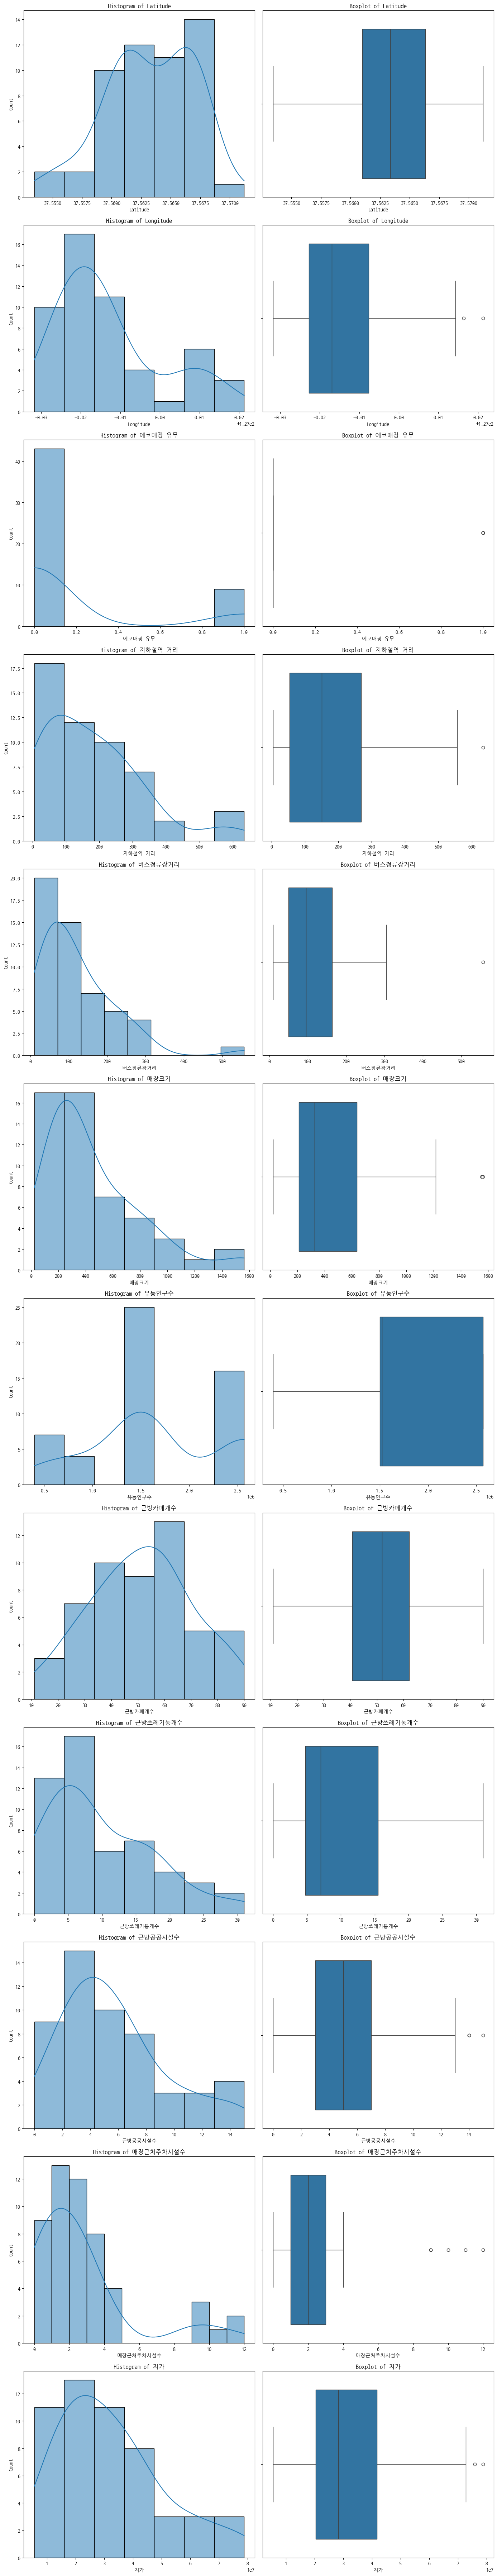

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms and boxplots for the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(14, len(numeric_columns) * 6))

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')

    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

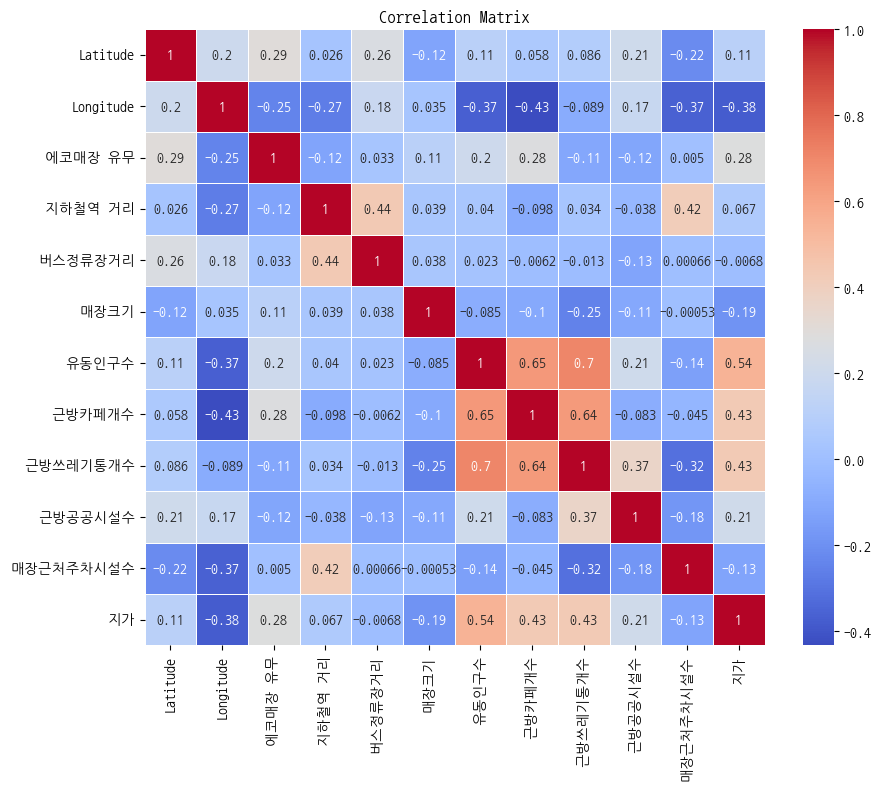

In [5]:
from sklearn.preprocessing import LabelEncoder

# Dropping 'branchnm' and '동이름' for correlation calculation
df_corr = df.drop(columns=['branchnm'])

# Calculating the correlation matrix
corr_matrix = df_corr.corr()

# Plotting the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Scaling

In [6]:
# 변수가 정규분포같지 않아서 minmax쓰는 게 나을 것 같음
from sklearn.preprocessing import MinMaxScaler

# Applying standard scaling
scaler = MinMaxScaler()

df_y = df['에코매장 유무']
df_x = df.drop('에코매장 유무', axis=1)

# Selecting numeric columns for scaling
numeric_columns = df_x.select_dtypes(include=['float64', 'int64']).columns

df_x[numeric_columns] = scaler.fit_transform(df_x[numeric_columns])

df_x.head()

,branchnm,Latitude,Longitude,지하철역 거리,버스정류장거리,매장크기,유동인구수,근방카페개수,근방쓰레기통개수,근방공공시설수,매장근처주차시설수,지가
0,숭례문북창,0.458308,0.164236,0.526232,0.144424,0.233663,0.507456,0.734177,0.419355,0.466667,0.333333,0.454920
1,을지로4가역,0.712130,0.547845,0.030207,0.126143,0.596644,0.230012,0.468354,0.193548,0.066667,0.166667,0.363710
2,동대문두타,0.806644,0.728234,0.313196,0.254113,0.135810,0.543363,0.164557,0.193548,0.933333,0.333333,0.453418
3,대한상공회의소R,0.399519,0.105598,0.419714,0.477148,0.246677,0.507456,0.607595,0.225806,0.200000,1.000000,0.533979
4,국립중앙의료원,0.806644,0.728234,0.163752,0.053016,0.052660,0.543363,0.164557,0.193548,0.933333,0.333333,0.251471


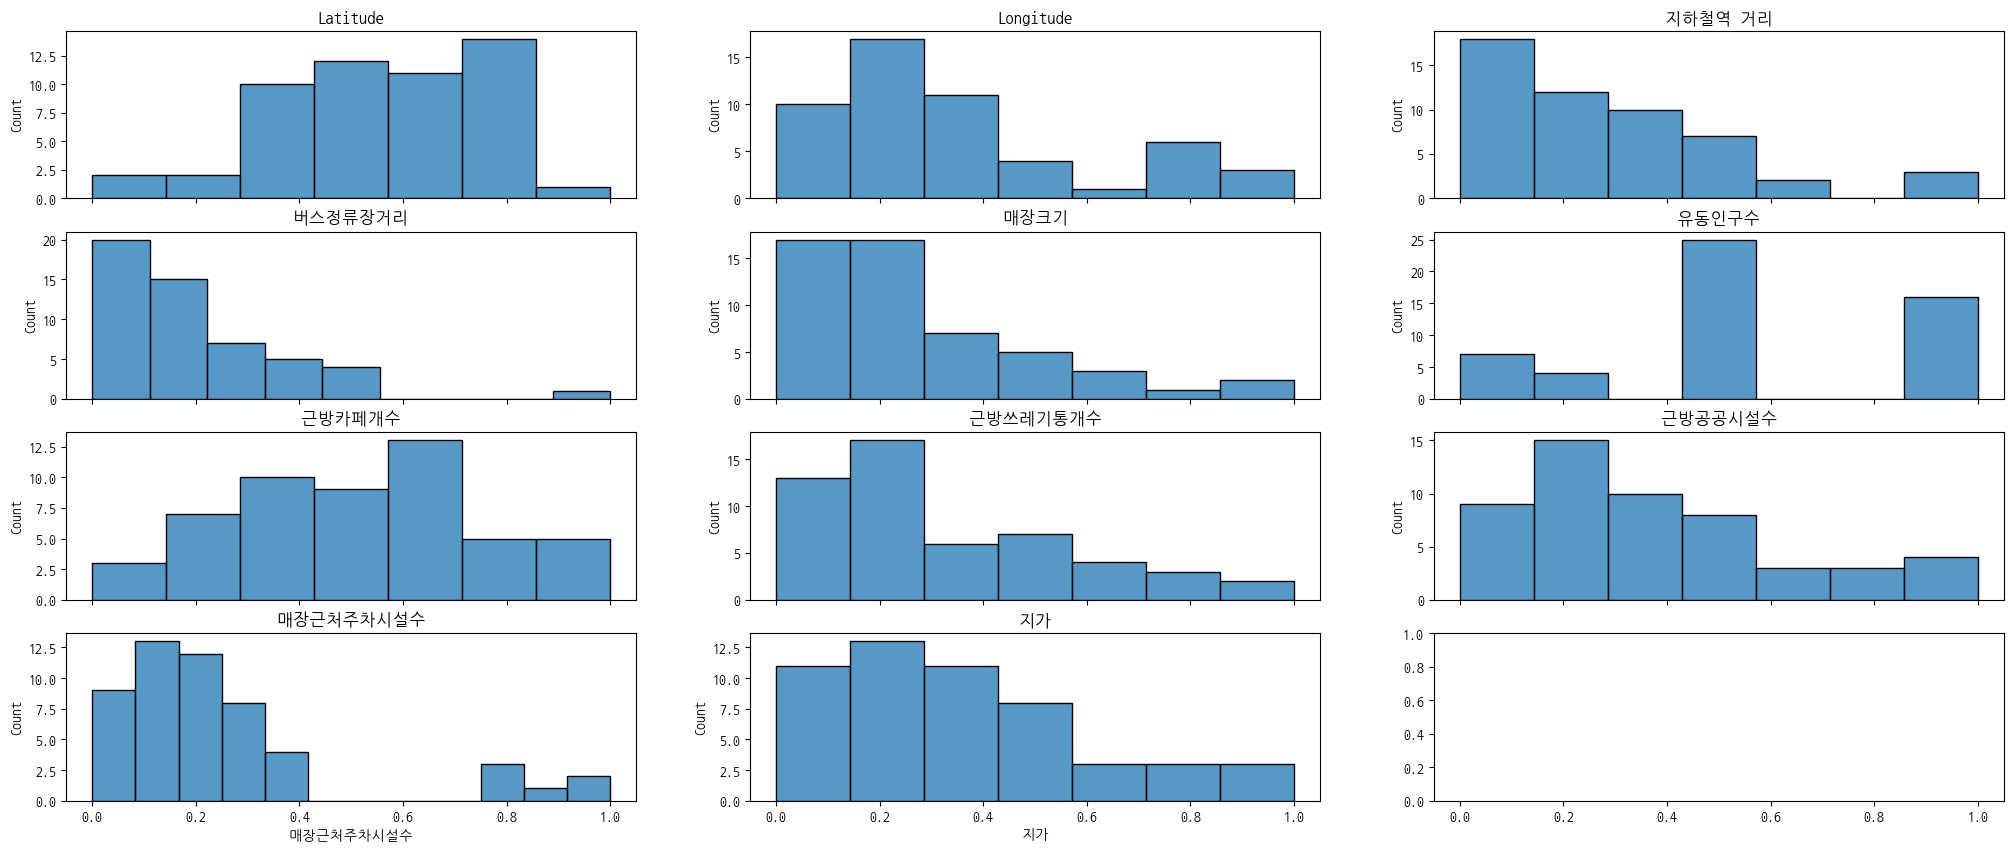

In [26]:
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(25,10))
dff = df_x.drop('branchnm', axis=1)
x = 0
for i, col in enumerate(dff):
    sns.histplot(dff[col], ax = axes[x,i%3])
    axes[x, i%3].set_title(col)
    if (i+1)%3 == 0: x += 1

#### 에코매장과 아닌 매장 구분 분석

In [28]:
df_cleaned = pd.concat([df_y, df_x], axis=1)

# Drop 'branchnm' for analysis
df_cleaned = df_cleaned.drop(columns=['branchnm'])

# Descriptive statistics for eco-friendly vs non-eco-friendly stores
eco_stats = df_cleaned[df_cleaned['에코매장 유무'] == 1].describe()
non_eco_stats = df_cleaned[df_cleaned['에코매장 유무'] == 0].describe()

print("Eco-friendly Stores Statistics:")
print(eco_stats)
print("\nNon Eco-friendly Stores Statistics:")
print(non_eco_stats)

Eco-friendly Stores Statistics:
       에코매장 유무  Latitude  Longitude   지하철역 거리   버스정류장거리      매장크기     유동인구수  \
count      9.0  9.000000   9.000000  9.000000  9.000000  9.000000  9.000000   
mean       1.0  0.686873   0.225863  0.211977  0.216535  0.337383  0.726364   
std        0.0  0.176288   0.064423  0.135481  0.185206  0.281794  0.259594   
min        1.0  0.298734   0.107679  0.041335  0.000000  0.055609  0.507456   
25%        1.0  0.720665   0.198280  0.103339  0.100548  0.177034  0.507456   
50%        1.0  0.760398   0.220279  0.178060  0.160878  0.320202  0.507456   
75%        1.0  0.778390   0.276709  0.330684  0.389397  0.397962  1.000000   
max        1.0  0.810162   0.312724  0.435612  0.517367  1.000000  1.000000   

         근방카페개수  근방쓰레기통개수   근방공공시설수  매장근처주차시설수        지가  
count  9.000000  9.000000  9.000000   9.000000  9.000000  
mean   0.654008  0.254480  0.311111   0.222222  0.517631  
std    0.181900  0.226637  0.057735   0.072169  0.238908  
min    0.379747  0.0

In [29]:
# Correlation matrix with '에코매장 유무'
corr_with_eco = df_cleaned.corr()['에코매장 유무'].sort_values(ascending=False)

print("Correlation with 에코매장 유무:")
print(corr_with_eco)

Correlation with 에코매장 유무:
에코매장 유무      1.000000
Latitude     0.294418
지가           0.282658
근방카페개수       0.275475
유동인구수        0.204283
매장크기         0.113457
버스정류장거리      0.032825
매장근처주차시설수    0.005018
근방쓰레기통개수    -0.112537
근방공공시설수     -0.119998
지하철역 거리     -0.121265
Longitude   -0.245709
Name: 에코매장 유무, dtype: float64


In [18]:
df_cleaned

,Latitude,Longitude,에코매장 유무,지하철역 거리,버스정류장거리,매장크기,유동인구수,근방카페개수,근방쓰레기통개수,근방공공시설수,매장근처주차시설수,지가
0,37.561597,126.976969,0,336,89,382.5800,1499484,69,13,7,4,38880000.0
1,37.566105,126.997317,0,24,79,941.5249,896443,48,6,1,2,32200000.0
2,37.567784,127.006885,0,202,149,231.9000,1577531,24,6,14,4,38770000.0
3,37.560552,126.973859,0,269,271,402.6200,1499484,59,7,3,12,44670000.0
4,37.567784,127.006885,0,108,39,103.8600,1577531,24,6,14,4,23980000.0
5,37.561408,126.998501,0,279,204,1551.5900,962636,42,2,4,2,11850000.0
6,37.561170,126.982516,0,217,50,210.6000,1524685,58,18,11,0,41800000.0
7,37.565023,127.005325,0,5,11,354.0800,1577531,37,12,6,1,23410000.0
8,37.566963,126.982283,1,70,71,108.4000,2570059,82,17,5,3,63660000.0
9,37.560976,127.007581,0,55,111,290.5100,670082,21,2,1,0,14220000.0


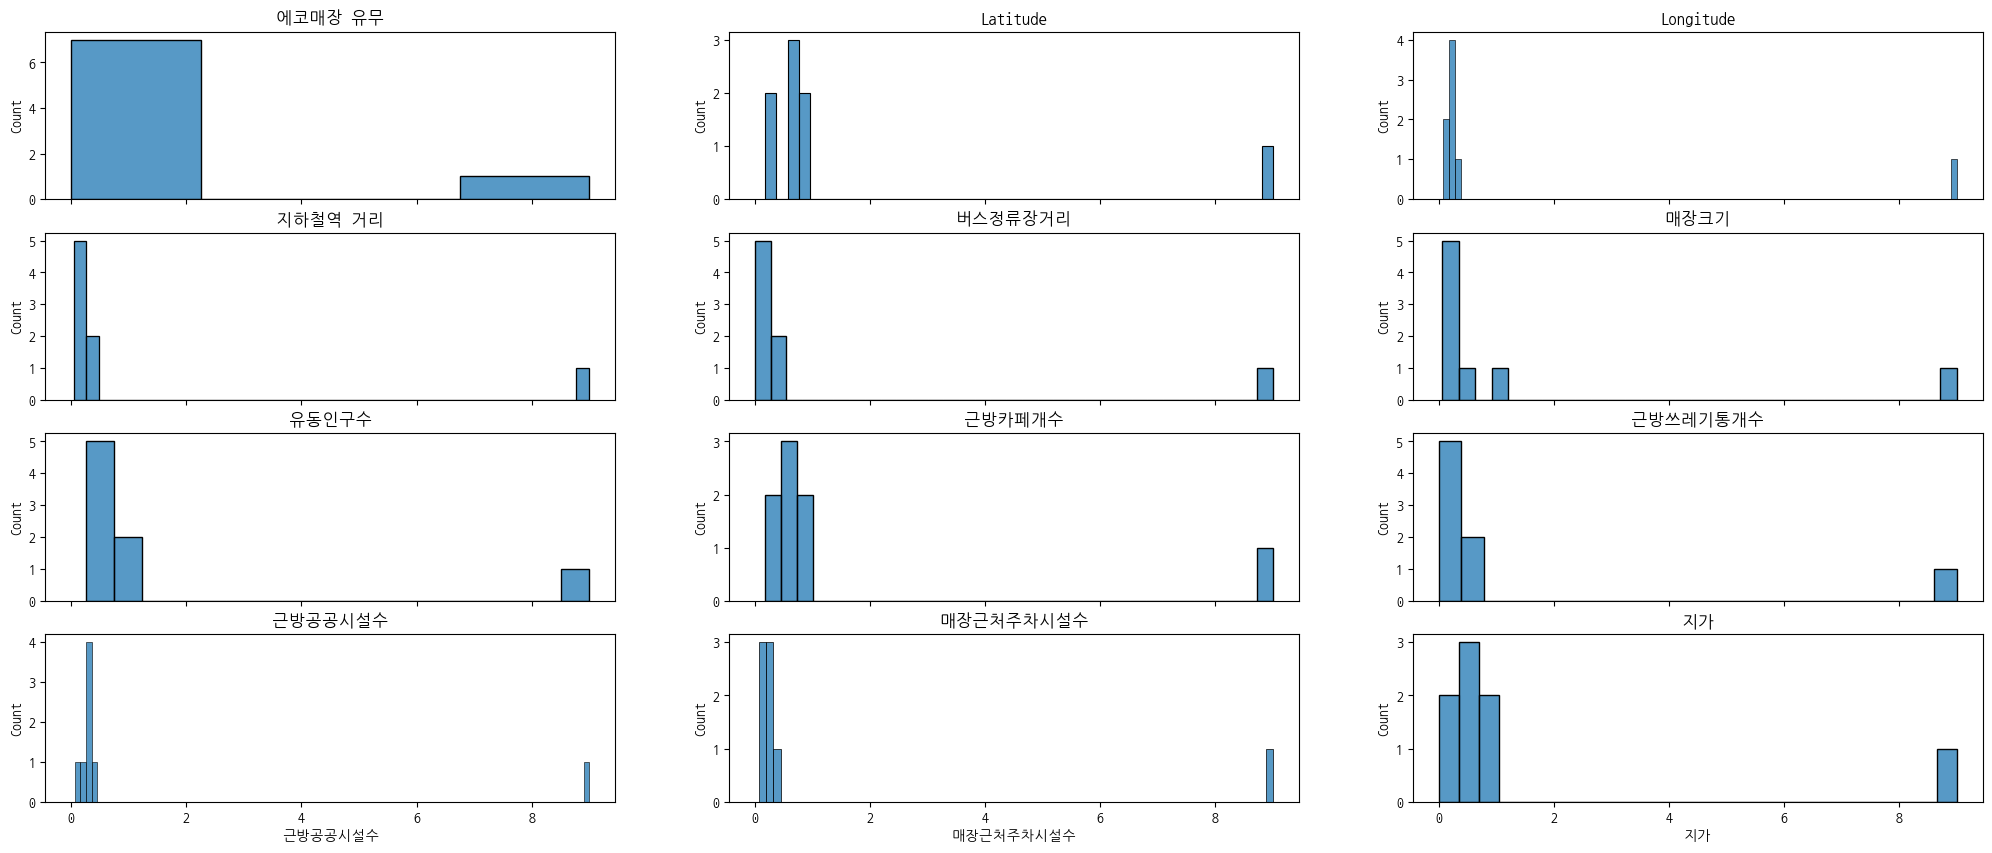

In [30]:
# 에코매장 히스토그램
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(25,10))

x = 0
for i, col in enumerate(eco_stats):
    sns.histplot(eco_stats[col], ax = axes[x,i%3])
    axes[x, i%3].set_title(col)
    if (i+1)%3 == 0: x += 1

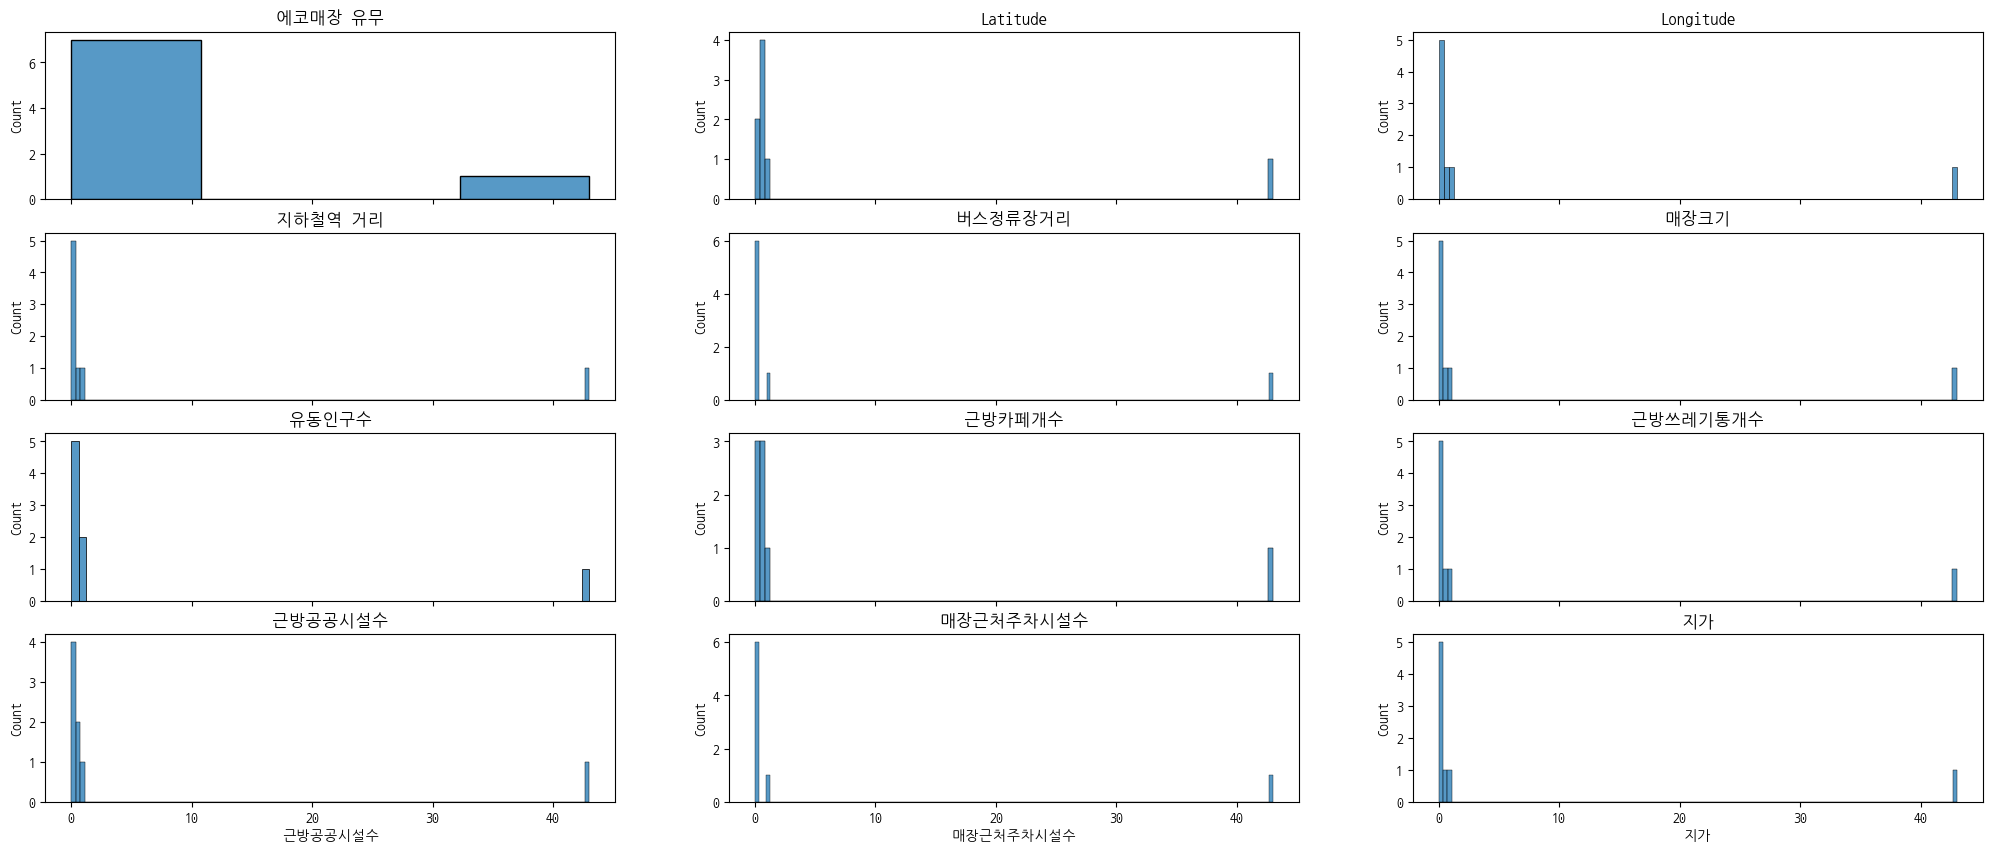

In [31]:
# 비에코매장 히스토그램
fig, axes = plt.subplots(4, 3, sharex=True, figsize=(25,10))

x = 0
for i, col in enumerate(non_eco_stats):
    sns.histplot(non_eco_stats[col], ax = axes[x,i%3])
    axes[x, i%3].set_title(col)
    if (i+1)%3 == 0: x += 1

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df_cleaned.drop(columns=['에코매장 유무'])
y = df_cleaned['에코매장 유무']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
      Feature  Importance
3     버스정류장거리    0.188785
10         지가    0.158188
6      근방카페개수    0.102991
7    근방쓰레기통개수    0.099456
8     근방공공시설수    0.091724
0    Latitude    0.090779
4        매장크기    0.086662
1   Longitude    0.079084
9   매장근처주차시설수    0.046085
2     지하철역 거리    0.034301
5       유동인구수    0.021946


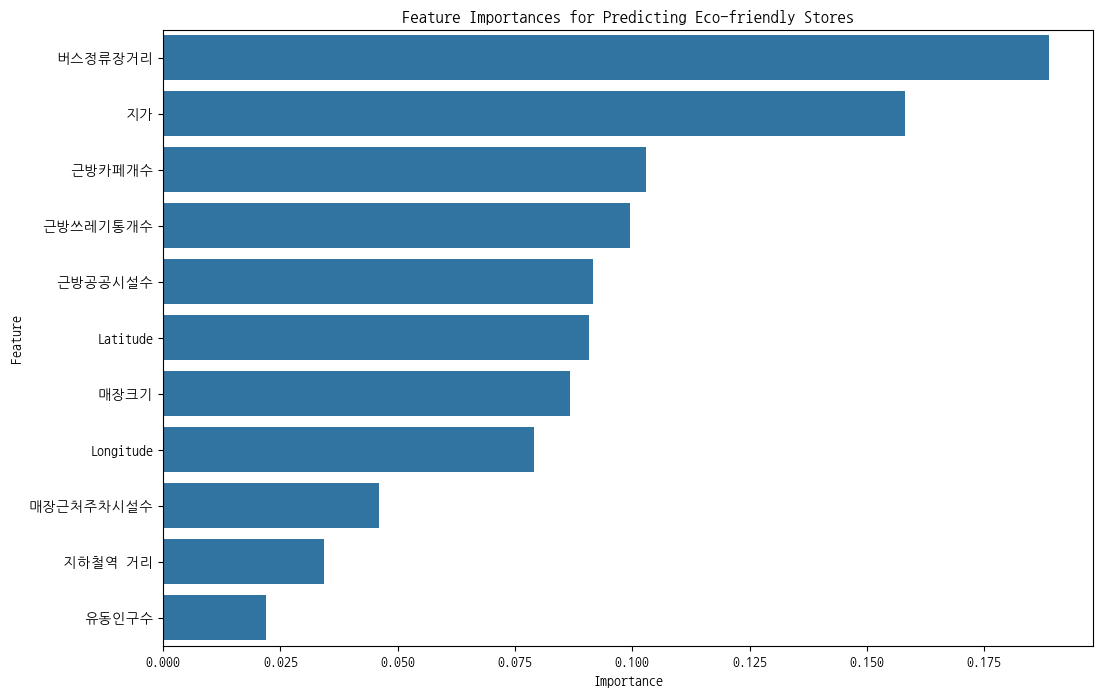

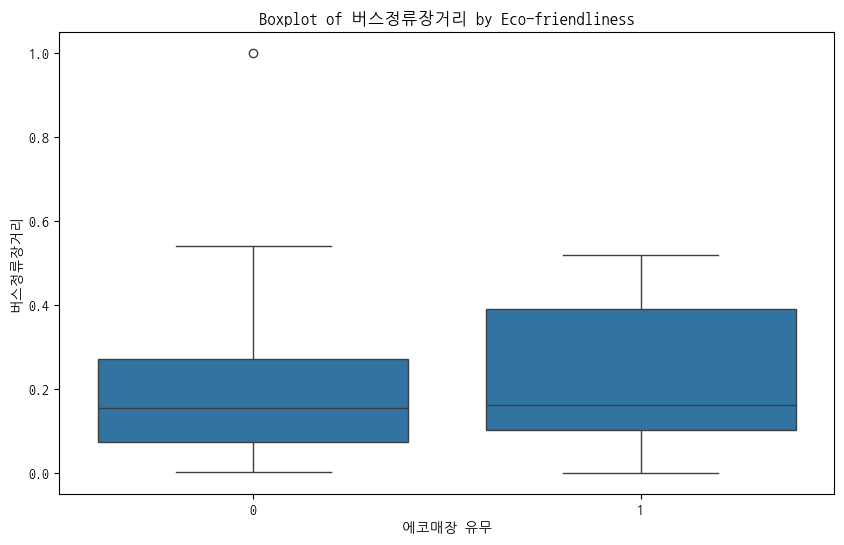

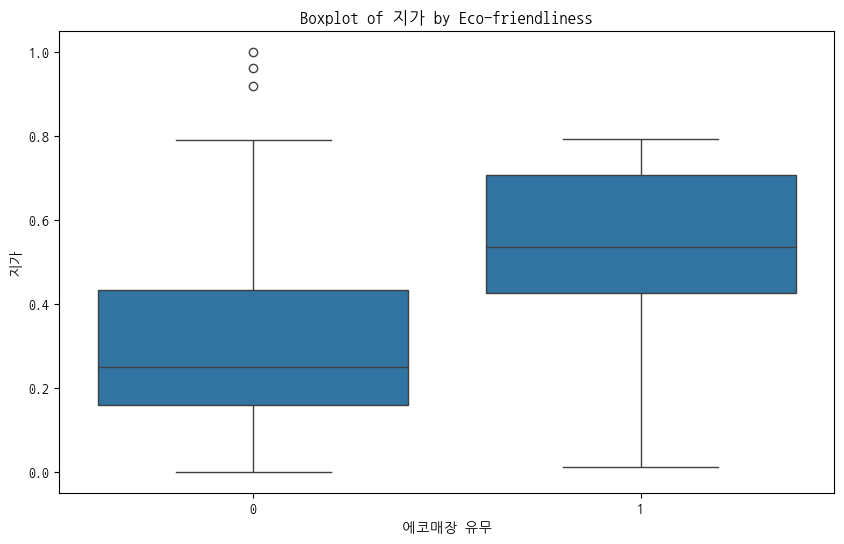

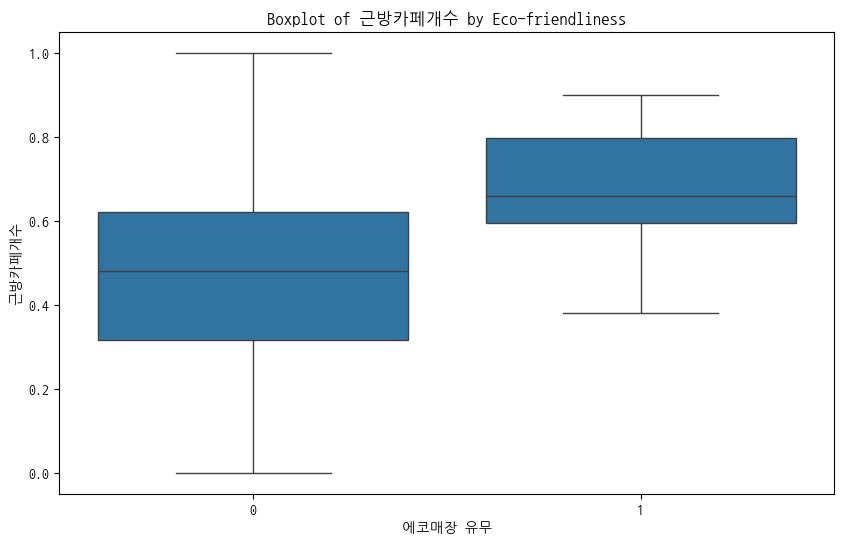

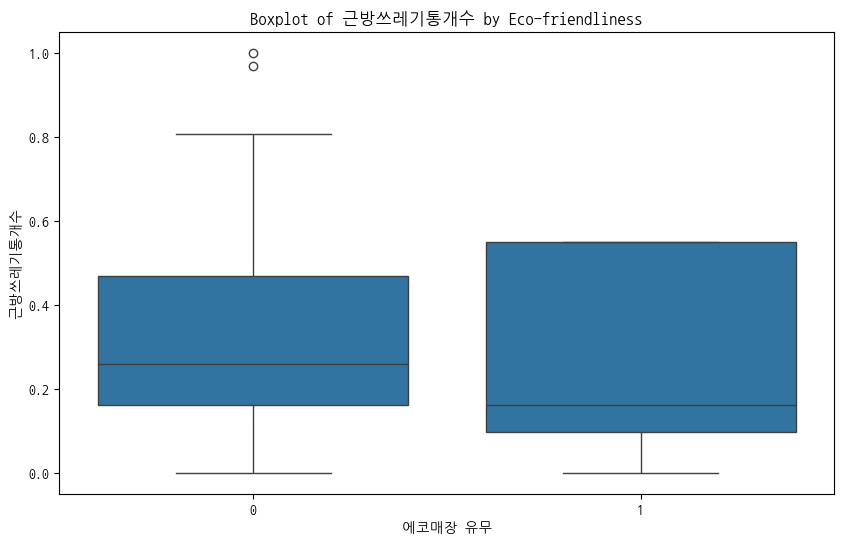

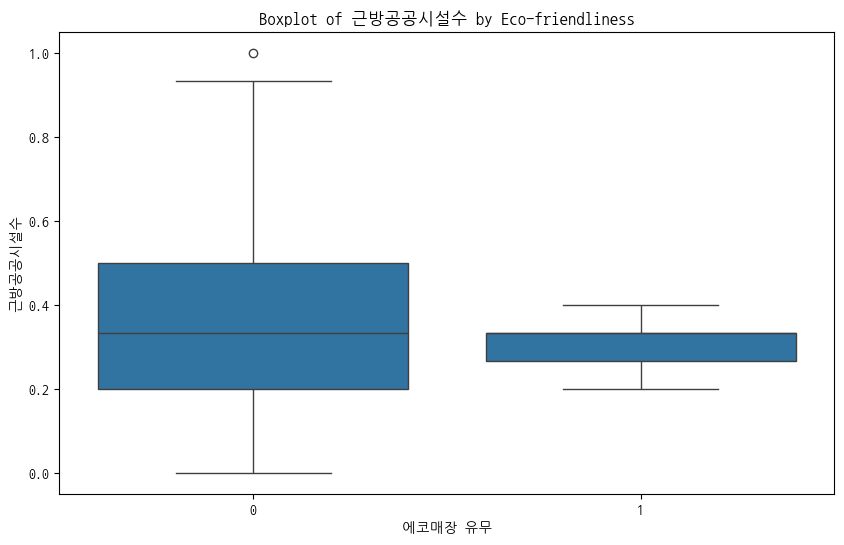

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances for Predicting Eco-friendly Stores')
plt.show()

# Boxplots for key features
key_features = feature_importances['Feature'].head(5)  # Top 5 important features

for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='에코매장 유무', y=feature, data=df_cleaned)
    plt.title(f'Boxplot of {feature} by Eco-friendliness')
    plt.show()